# 군집분석이라?

## 군집분석
1. 군집분석이란
  - 서로 유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업 또는 이에 기반한 분석을 의미한다
  - 유사도가 높은 데이터끼리 그룹화(대표적으로 유클리드 거리계산식으로 이용)
  - 계층형 클러스터링과 비계층형 클러스터링으로 분류
  - 주요 알고리즘 : k-means, hierarchical 등
<br></br>
2. 군집분석의 특진
  - 종속변수(y)가 없는 데이터 마이닝 기법(비지도 학습)
  - 유클리드 거리 기반 유사 객체 묶음(유사성 - 유클리드 거리)
  - 전체적인 데이터 구조를 파악하는데 이용
  - 분석 결과에 대한 가설 검정 없음(타당성 검증 방법 없음)
  - 계층적 군집분석(탐색적), 비계층적 군집분석(확인적)
  <br></br>
3. 계층적 군집분석(hiearchical)
  - 유클리드 거리를 이용한 군집분석 방법
  - 계층적으로 군집 결과 도출
  - 탐색적 군집분석
  - 계층적 군집분석의 결과 : 덴드로그램(Dendrogram) - 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림
  - 군집 수는 사용자가 정할 수 있음
<br></br>
4. 비계층적 군집분석(k-means)
  - 계층적 군집분석보다 속도 빠름
  - 군집의 수를 알고 있는 경우 이용
  - k는 미리 정하는 군집수
  - 확인적 군집분석
  - 계층적 군집화의 결과에 의거하여 군집 수 결정
  - 변수보다 관측대상 군집화에 많이 이용
  - 군집의 중심(cluster center)은 사용자가 정함
<br></br>
5. k-means 군집분석 알고리즘<br>
1) k값을 초기값으로 k개의 centroid 선정(랜덤)<br>
2) 각 데이터 포인터를 가장 가까운 centroid에 할당<br>
3) centroid에 할당된 모든 데이터 포인터의 중심 위치 계산(centroid 재조정)<br>
4) 재조정된 centroid와 가장 가까운 데이터 포인트 할당<br>
5) centroid 재조정이 발생되지 않을 때까지 3), 4) 단계 반복
  <br></br>

# hierachical_계층적 군집분석

- 유클리드 거리계산식 이용

In [8]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

In [15]:
from sklearn.datasets import load_iris

# 계층적 군집분석 함수
from scipy.cluster.hierarchy import linkage, dendrogram
# linkage : scipy가 갖고있는 군집분석기능

iris = load_iris()

In [19]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df['labels'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
X, y = load_iris(True)
# return_X_y = True

## 계층적 군집분석
- 이건 책에 없음

In [20]:
# 계층적군집분석의 연결방식 : 단순연결(single), 완전연결(complete), 평균연결방식(average)
cluster = linkage(y=iris_df, method='complete', metric='euclidean')
# metric='euclidean' 이거 생략해도된대...
# df데이터프레임 형태로 갖고와야된대
cluster.shape
# 완전연결을 햇지만 하나가 유실됏음... 거리가 애매한듯

(149, 4)

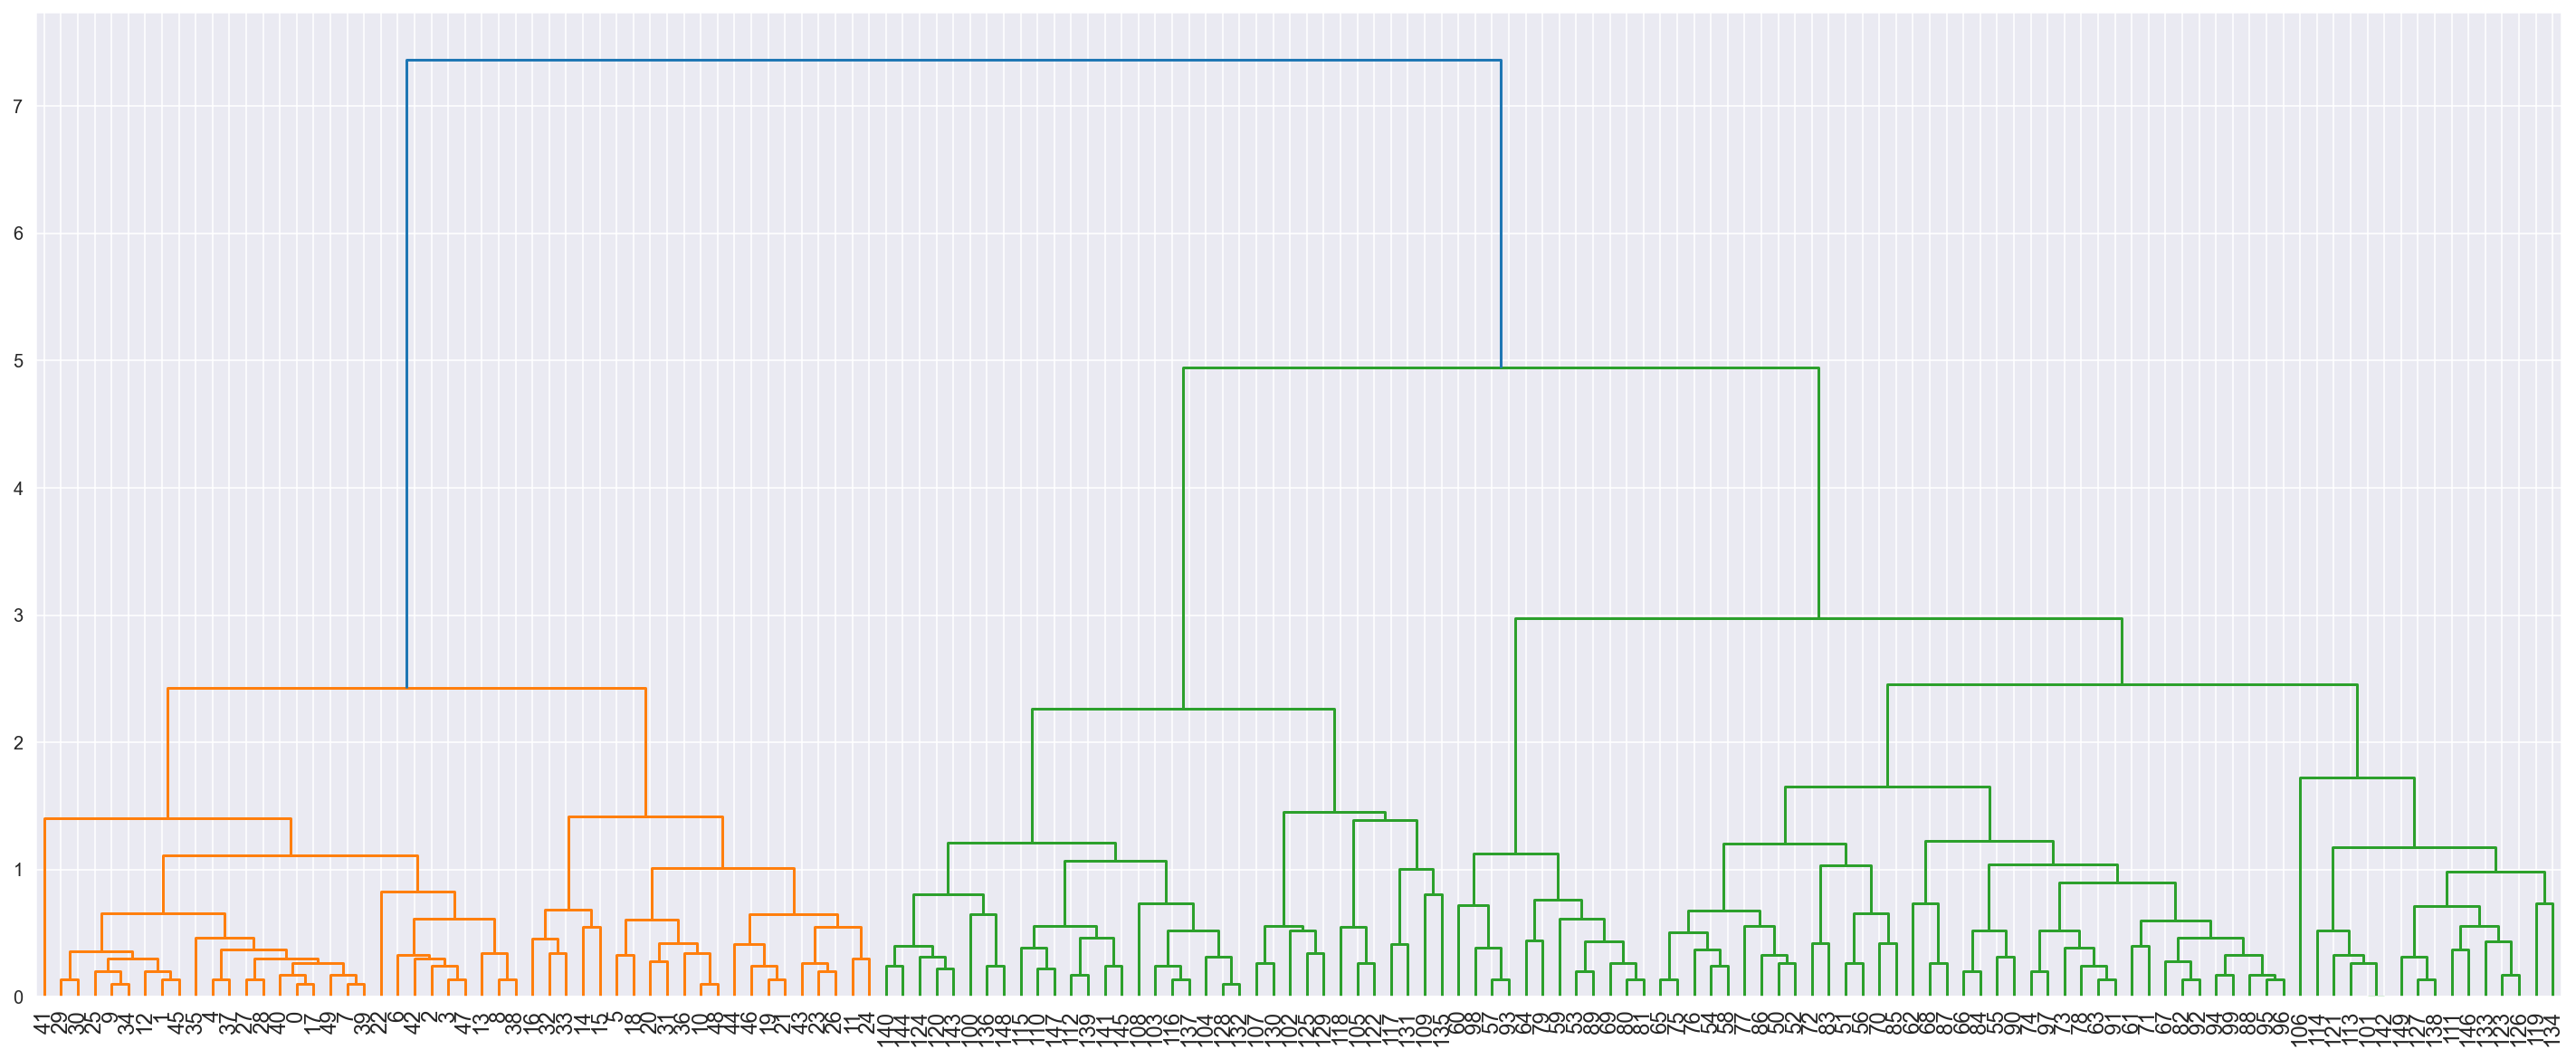

In [23]:
# 군집수 결정 : 덴드로그램 시각화
plt.figure(figsize=(25, 10))
# leaf_rotation : 글자각도
# leaf_font_size : 글자크기
dendrogram(cluster, leaf_rotation=90, leaf_font_size=12)

plt.show()

In [24]:
# 클러스터링 결과
from scipy.cluster.hierarchy import fcluster
# 지정한 클러스터의 수로 자르는 함수

cut_tree = fcluster(cluster, t=3, criterion = 'distance')

# prediction
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [25]:
labels = iris_df['labels'] 
# 정답

df = pd.DataFrame({'pred' : cut_tree, 'labels' : labels})
df
# 그냥 출력하면 이해하기 어려움

,pred,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [27]:
con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat
# 많이 못골라ㅏ낸다
# 0,1,2가 각각 뭔지는 모르지만 우리는 아이리스 데이터셋에 종류가 세가지 잇는것도 알고
# 세가지가 각각 50개씩 잇는것도 앎
# 그 상태에서 결과를 보면 0과 1은 나름 잘 분류가 된것같은데
# 2는 혼재돼잇음
# 아까 시각화를 봣을때 두 종류가 겹쳐져있었다는걸 생각하면
# 그 부분을 잘 분류하지 못햇다고 추측할 수 있음
# 근데 아이리스는 우리가 이미 아는 데이터이기 때문에
# 아예 모르는 데이터를 분석했을때도 생각해야함
# 이건 비지도학습(답이 없음)을 하고 있기 때문에

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [28]:
iris_df['cluster'] = cut_tree
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


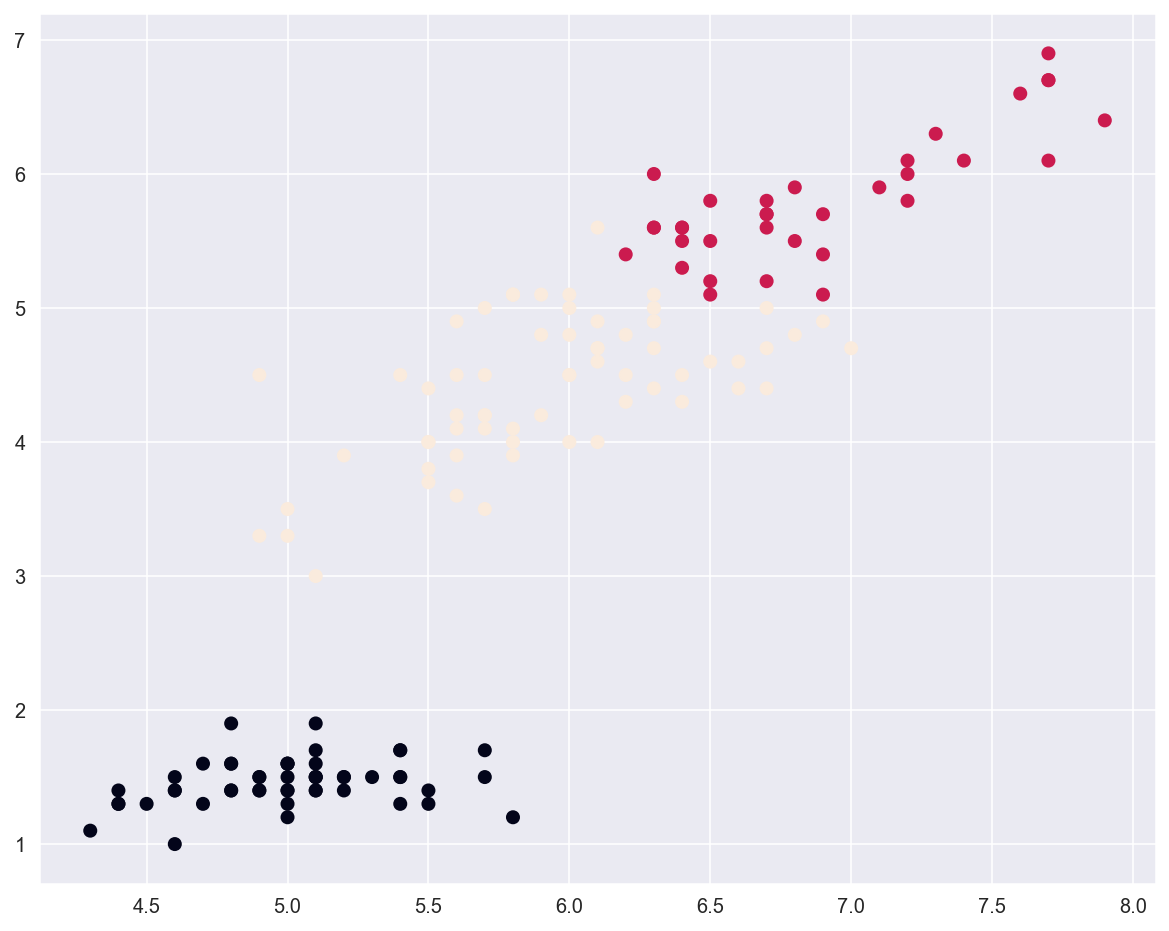

In [31]:
# 클러스터로 분리된 값 산점도 시각화
plt.scatter(x=iris_df['sepal_length'],
            y=iris_df['petal_length'],
            c=iris_df['cluster'])

In [32]:
# 클러스터 빈도수
iris_df['cluster'].value_counts()

3    66
1    50
2    34
Name: cluster, dtype: int64

In [ ]:
# 각 클러스터별 통계
cluster_g = iris_df.groupby('cluster').mean()
cluster_g
# 이거는 계층적인 클러스터
# 우리 책에는 비계층적인 클러스터가 있음
# 435p

# k-means : 비계층적 군집분석

max_iter : 최대반복횟수<br>
    그전에 군집분석이 끝나면 조기종료된다

In [34]:
iris_df.head()
# 전에 만들어놓은 cluster(예측한 결과) 없애야겟다

,sepal_length,sepal_width,petal_length,petal_width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [35]:
# target을 제외한 feature를 이용해서 데이터 프레임을 생성
iris = load_iris()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()
# 비지도학습이라 '답'이 없어서 train과 test로 안나눈다

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [38]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target', 'cluster']).size()
iris_result
# 결과는.. 제대로 군집분석이 안된것같도다

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [39]:
from sklearn.decomposition import PCA

# PCA 차원축소
pca = PCA(n_components = 2)

# 스케일링해야하는데 지금은 살짝 건너..뜀?
# 원래 PCA하기전에 표준화해야된대
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
# 행을 다 갖고올거고 축은 0/1

iris_df.head()
# 오른쪽에 축소된 차원이 보임

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


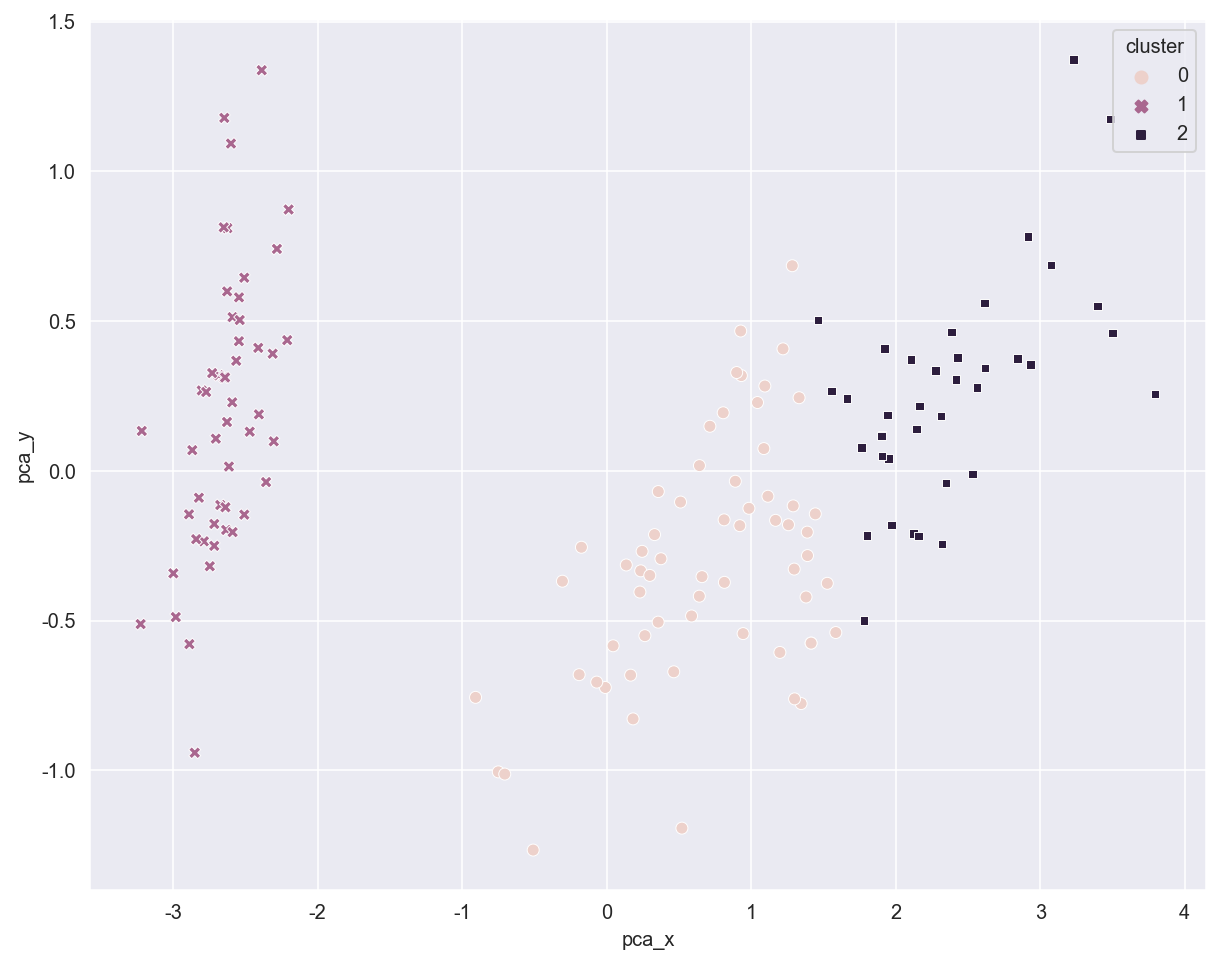

In [57]:
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df,
                hue='cluster', style='cluster')
# hue='cluster' : 색상
# style='cluster' : 스타일

plt.show()
# 1번은 명확히 분리됨
# 0과 2도 꽤 분리된걸로 보임

In [41]:
# 클러스터링 결과
pred = kmeans.predict(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [42]:
len(pred)

150

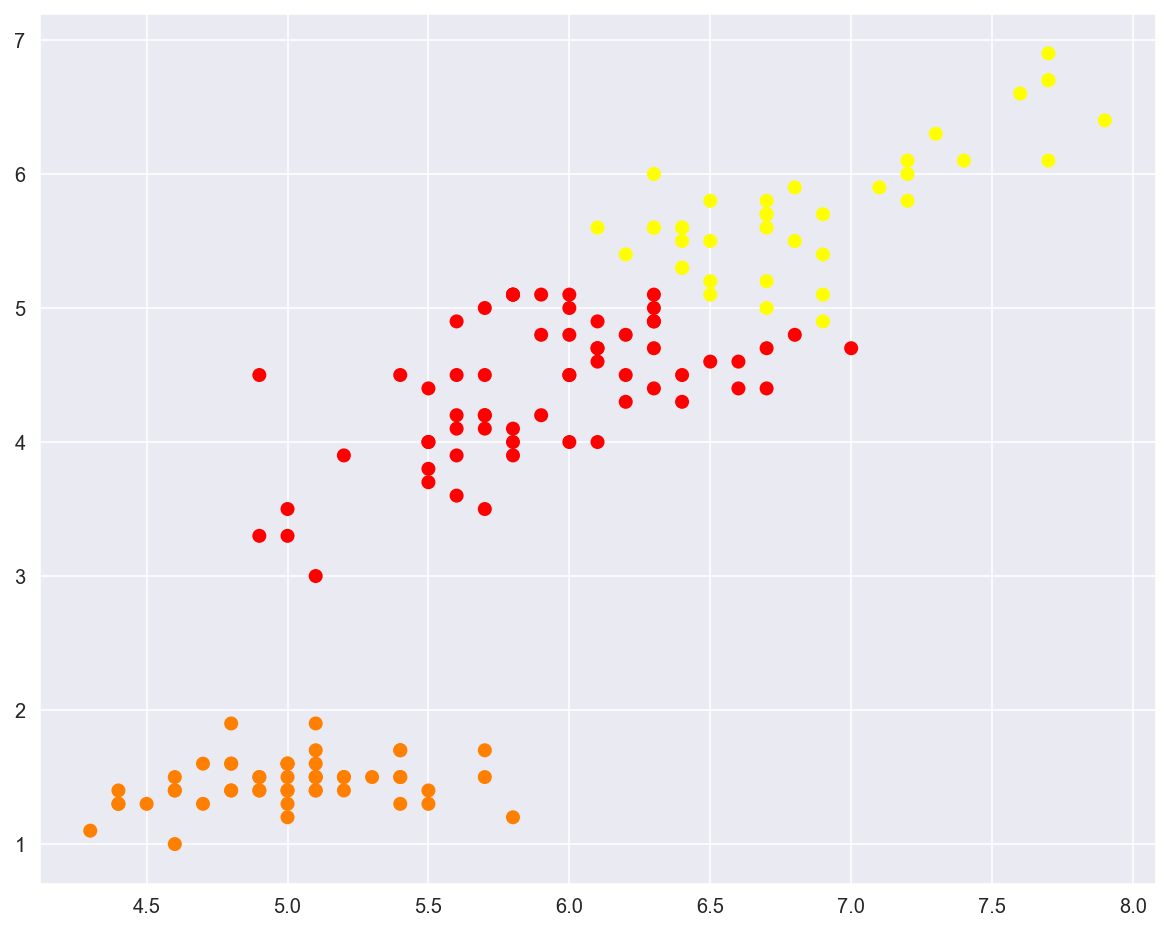

In [48]:
# 군집결과 시각화
plt.scatter(x=iris_df['sepal_length'],
            y=iris_df['petal_length'],
            c = pred,
           cmap='autumn')
plt.show()

In [49]:
# 군집별 중앙값(좌표)
centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

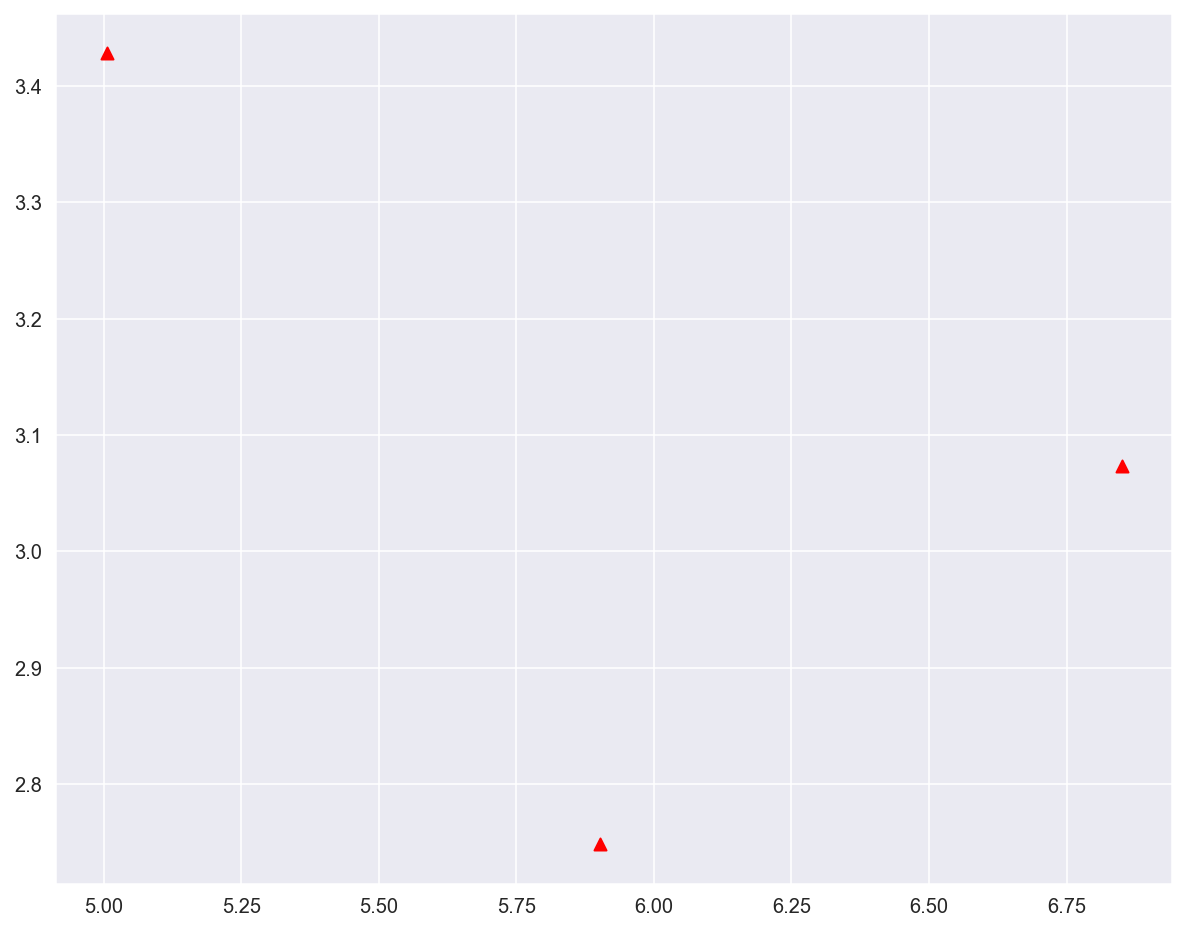

In [51]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:, 0], y=centers[:, 1], marker='^', c='r')
plt.show()

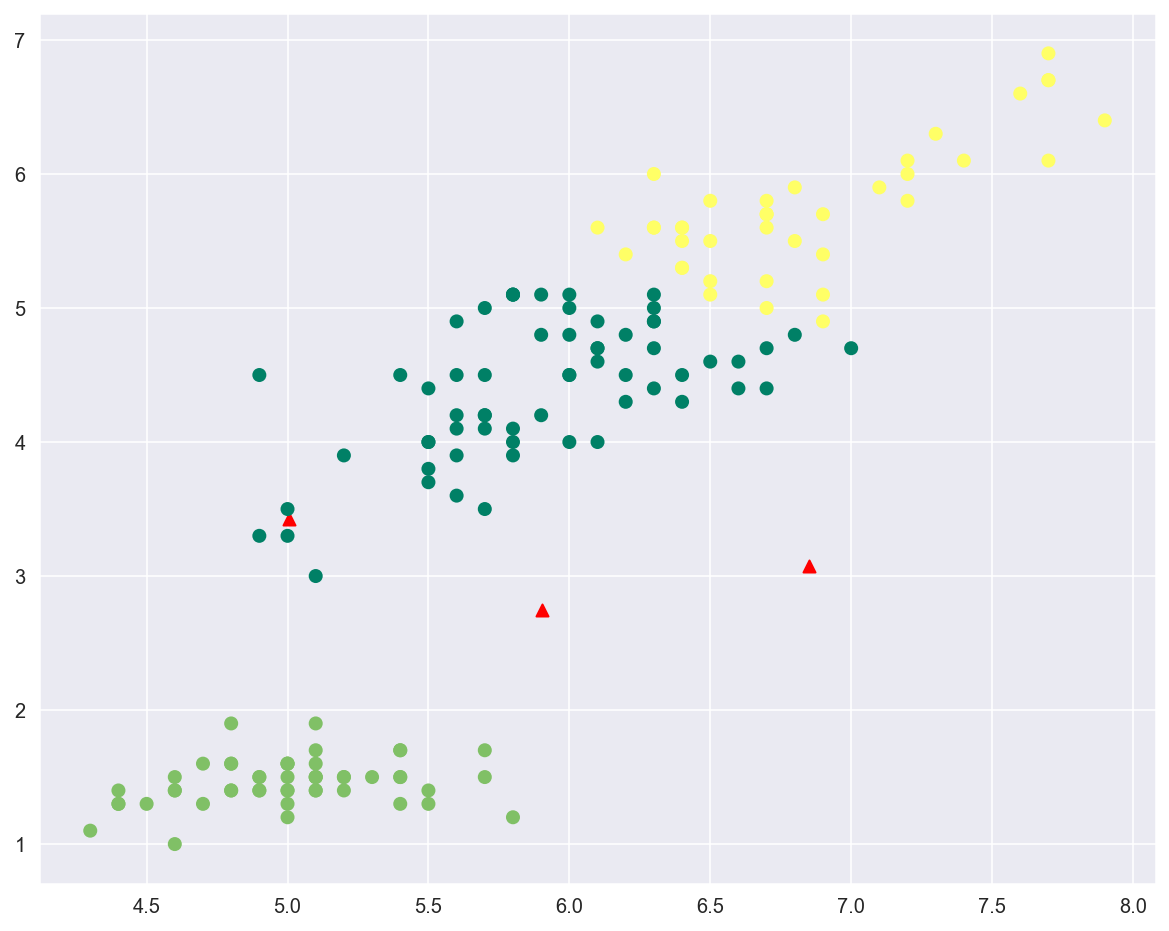

In [54]:
# 군집결과와 중앙값을 함께 시각화
plt.scatter(x=centers[:, 0], y=centers[:, 1], marker='^', c='r')
plt.scatter(x=iris_df['sepal_length'],
            y=iris_df['petal_length'],
            c = pred,
           cmap='summer')
plt.show()
# ? 너무 안맞는데
# centers 값을 잘못잡앗나봐
# sepal은0 petal은2

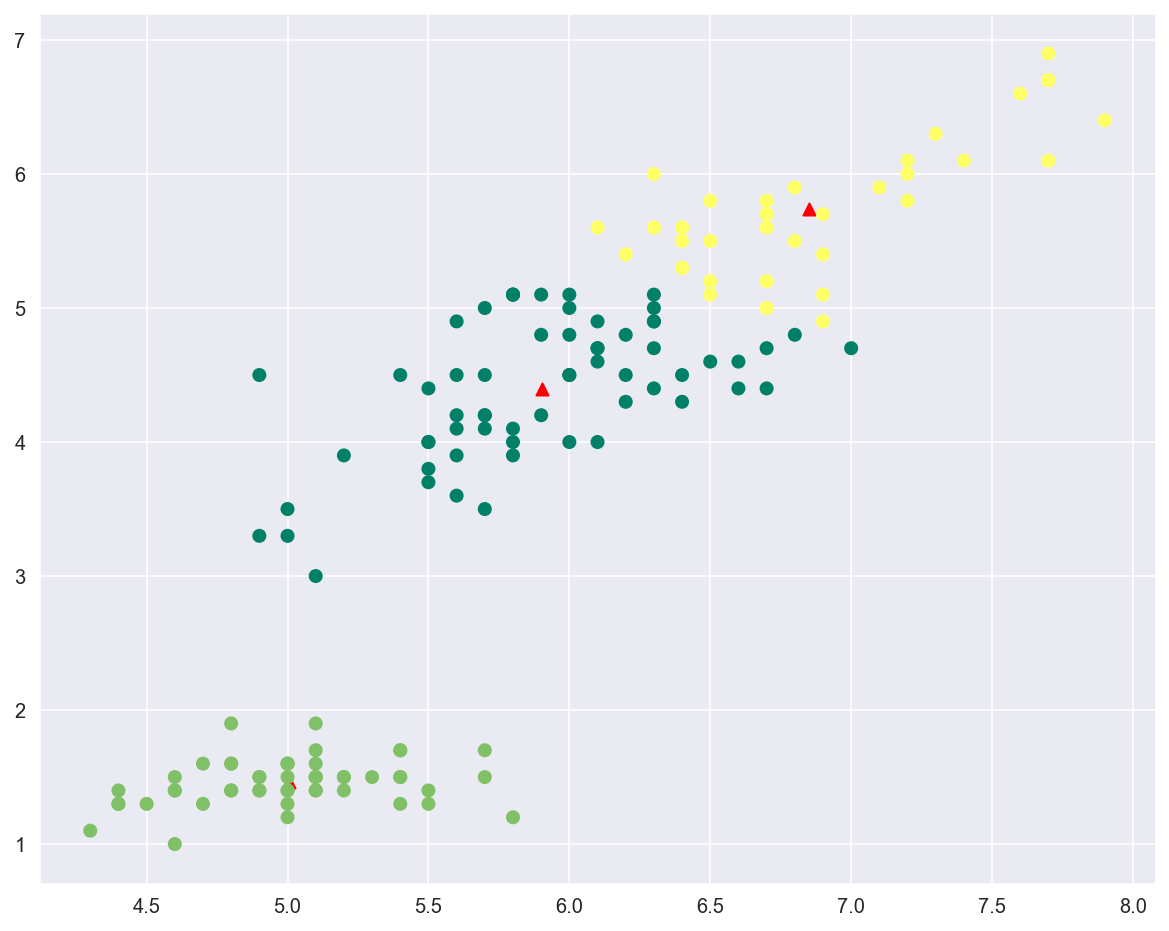

In [55]:
# 군집결과와 중앙값을 함께 다시 시각화
plt.scatter(x=centers[:, 0], y=centers[:, 2], marker='^', c='r')
plt.scatter(x=iris_df['sepal_length'],
            y=iris_df['petal_length'],
            c = pred,
           cmap='summer')
plt.show()
# 이제 잘맞다